<h2 align="center" style="color:LightkGray;"> <mark>Income Inequality Prediction</mark></h2> 

<hr/>
<h3 align="center" style="color:OrangeRed;"> 🔌 Set-up 🔌</h3>
<hr/>


#### Importing Libraries

In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from optuna.samplers import TPESampler

from sklearn import svm
from sklearn import metrics
from sklearn.utils import resample
from collections import Counter

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')
sns.color_palette("husl", 9)
#from google.colab import drive
#drive.mount('/content/drive')

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8369430560927636, 0.5495828952802333, 0.1952683223448124),
 (0.6430915736746491, 0.6271955086583126, 0.19381135329796756),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.20582072623426667, 0.6842209016721069, 0.5675558225732941),
 (0.2151139535594307, 0.6700707833028816, 0.7112365203426209),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.731751635642941, 0.5128186367840487, 0.9581005178234921),
 (0.9614880299080136, 0.3909885385134758, 0.8298287106954371)]

##### Loading Dataset

In [19]:
df = pd.read_csv("../Data/Data.csv")
df.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


<hr/>
<h3 align="center" style="color:Navy;"> 🔬 EDA 🔬</h3>
<hr/>

In [20]:
df.shape

(209499, 43)

In [21]:
df.columns

Index(['ID', 'age', 'gender', 'education', 'class', 'education_institute',
       'marital_status', 'race', 'is_hispanic', 'employment_commitment',
       'unemployment_reason', 'employment_stat', 'wage_per_hour',
       'is_labor_union', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'occupation_code_main',
       'total_employed', 'household_stat', 'household_summary',
       'under_18_family', 'veterans_admin_questionnaire', 'vet_benefit',
       'tax_status', 'gains', 'losses', 'stocks_status', 'citizenship',
       'mig_year', 'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state', 'importance_of_record',
       'income_above_limit'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [23]:
df.duplicated().sum()

0

><div style="border-radius:4px; padding: 8px; background-color: #fef5fa; font-color: #e0e0e0; font-size:85%; text-align:left">There are no duplicate rows.</div>

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,209499.0,34.518728,22.306738,0.00,15.00,33.00,50.00,90.0
employment_stat,209499.0,0.176760,0.555562,0.00,0.00,0.00,0.00,2.0
wage_per_hour,209499.0,55.433487,276.757327,0.00,0.00,0.00,0.00,9999.0
working_week_per_year,209499.0,23.158850,24.397963,0.00,0.00,8.00,52.00,52.0
industry_code,209499.0,15.332398,18.049655,0.00,0.00,0.00,33.00,51.0
occupation_code,209499.0,11.321734,14.460839,0.00,0.00,0.00,26.00,46.0
total_employed,209499.0,1.956067,2.365154,0.00,0.00,1.00,4.00,6.0
vet_benefit,209499.0,1.515854,0.850853,0.00,2.00,2.00,2.00,2.0
gains,209499.0,435.926887,4696.359500,0.00,0.00,0.00,0.00,99999.0
losses,209499.0,36.881737,270.383302,0.00,0.00,0.00,0.00,4608.0


<hr/>
<h3 align="center" style="color:Navy;"> 🔬 EDA 🔬</h3>
<hr/>

* Lets check for some random keywords used instead of correct values

In [25]:
for col in df.columns:
  print(col," => ",df[col].unique())

ID  =>  ['ID_TZ0000' 'ID_TZ0001' 'ID_TZ0002' ... 'ID_TZ99997' 'ID_TZ99998'
 'ID_TZ99999']
age  =>  [79 65 21  2 70 45 53 22 73 30  4 16 43 36  5 88 40 47 59 69 50 27 39 85
 29 41 14 33 67 52 11  9 13 19 26 23 37 58 63 46 62 28 31  3 18 78 15 38
  7 35  1 20  0 48 24 56 25  8 66 71 32 75 51 10 44 42 55 74 77 34 80 17
 83 86 12 68 60 57 64 72 90 61 82  6 84 49 76 54 89 81 87]
gender  =>  [' Female' ' Male']
education  =>  [' High school graduate' ' 12th grade no diploma' ' Children'
 ' Bachelors degree(BA AB BS)' ' 7th and 8th grade' ' 11th grade'
 ' 9th grade' ' Masters degree(MA MS MEng MEd MSW MBA)' ' 10th grade'
 ' Associates degree-academic program' ' 1st 2nd 3rd or 4th grade'
 ' Some college but no degree' ' Less than 1st grade'
 ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 5th or 6th grade'
 ' Doctorate degree(PhD EdD)']
class  =>  [nan ' Federal government' ' Private' ' Local government'
 ' Self-employed-incorporated' ' Self-employed-not inc


>#### some values from dataset
>
> - is_hispanic  =>  [' All other' ' Mexican-American' ' Central or South American'
> ' Mexican (Mexicano)' ' Puerto Rican' ' Other Spanish' ' NA' ' Cuban'
> ' Do not know' ' Chicano']
>
> - migration_prev_sunbelt  =>  [' ?' nan ' No' 'Same']
>
> '**Do not know**' ,'**NA**' and '**?**' are some values which can be replaced by null</

In [26]:
df.isnull().sum()

ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

In [27]:
nulls = [' NA',' Do not know', ' ?']

df.replace(nulls, np.nan, inplace = True)
df.isna().sum()

ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                         1187
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

In [28]:
matches = df['ID'].isin(df['ID'])

In [29]:
len(df['ID'].unique())


209499

><div style="border-radius:4px; padding: 8px; background-color: #fef5fa; font-color: #e0e0e0; font-size:90%; text-align:left">Eventhough index numbers and ID numbers differs by numbers, when we see the unique count equal to the number of row, it means that all IDs are unique and can be aborted.</div>

In [30]:
df.drop(['ID'],axis=1,inplace=True)
df.shape

(209499, 42)

* Lets check the columns that contains null values

In [31]:
def print_null(dft):
    for col in dft.columns:
        if(dft[col].isnull().sum()!=0):
            print(col,' => ',dft[col].isnull().sum())

print_null(df)

class  =>  105245
education_institute  =>  196197
is_hispanic  =>  1187
unemployment_reason  =>  202979
is_labor_union  =>  189420
occupation_code_main  =>  105694
under_18_family  =>  151654
veterans_admin_questionnaire  =>  207415
country_of_birth_own  =>  3667
country_of_birth_father  =>  7181
country_of_birth_mother  =>  6516
migration_code_change_in_msa  =>  106284
migration_prev_sunbelt  =>  193148
migration_code_move_within_reg  =>  106284
migration_code_change_in_reg  =>  106284
residence_1_year_ago  =>  106284
old_residence_reg  =>  193148
old_residence_state  =>  193889


* Checking columns having more than 50% of null values

In [32]:
colnames = df.isna().sum()/len(df)
highnull_cols = list(colnames[colnames.values>=0.5].index)
print(highnull_cols)

['class', 'education_institute', 'unemployment_reason', 'is_labor_union', 'occupation_code_main', 'under_18_family', 'veterans_admin_questionnaire', 'migration_code_change_in_msa', 'migration_prev_sunbelt', 'migration_code_move_within_reg', 'migration_code_change_in_reg', 'residence_1_year_ago', 'old_residence_reg', 'old_residence_state']


* lets plot the null values in data

<AxesSubplot:>

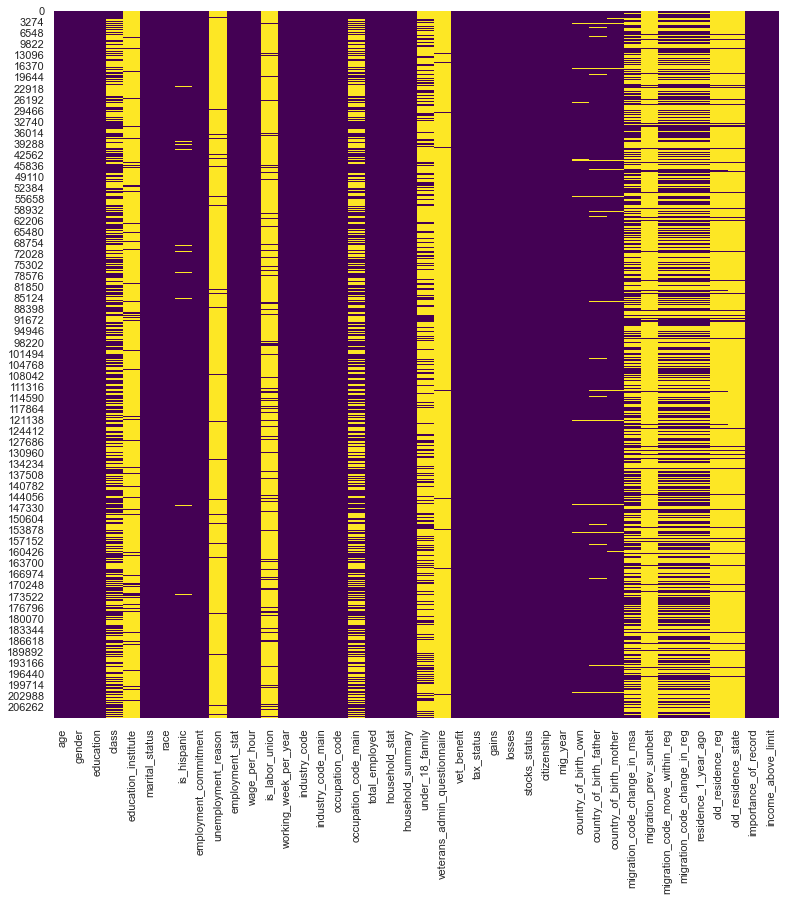

In [42]:
sns.set(font_scale=1.0)
fig, ax = plt.subplots(figsize=(13, 13))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis', fmt=".1f")

##### correlation before pre-processing 

<AxesSubplot:>

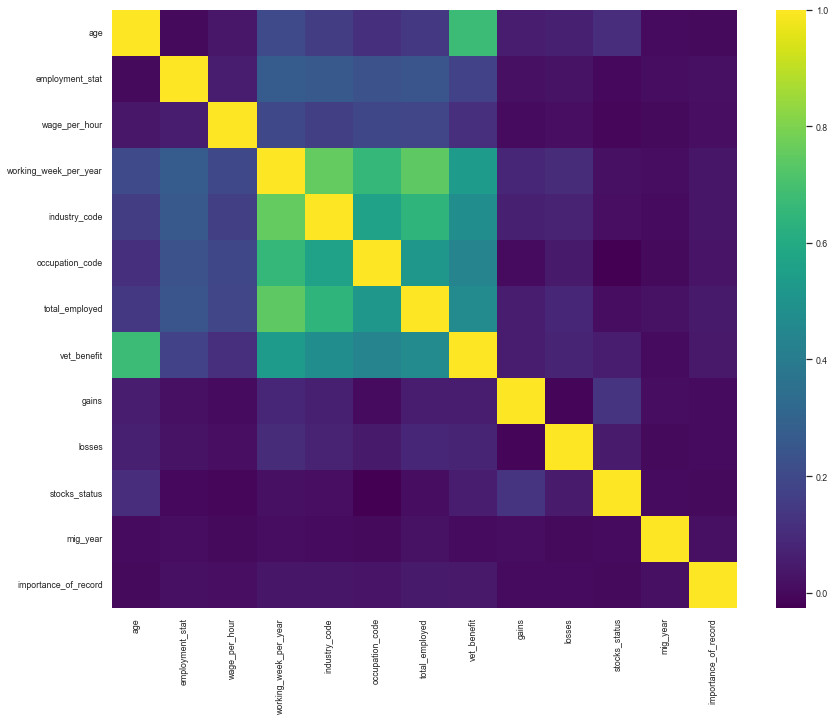

In [45]:
plt.figure(figsize=(14,11))
sns.set(font_scale=0.8)
sns.heatmap(df.corr(), annot=False, cmap = 'viridis')

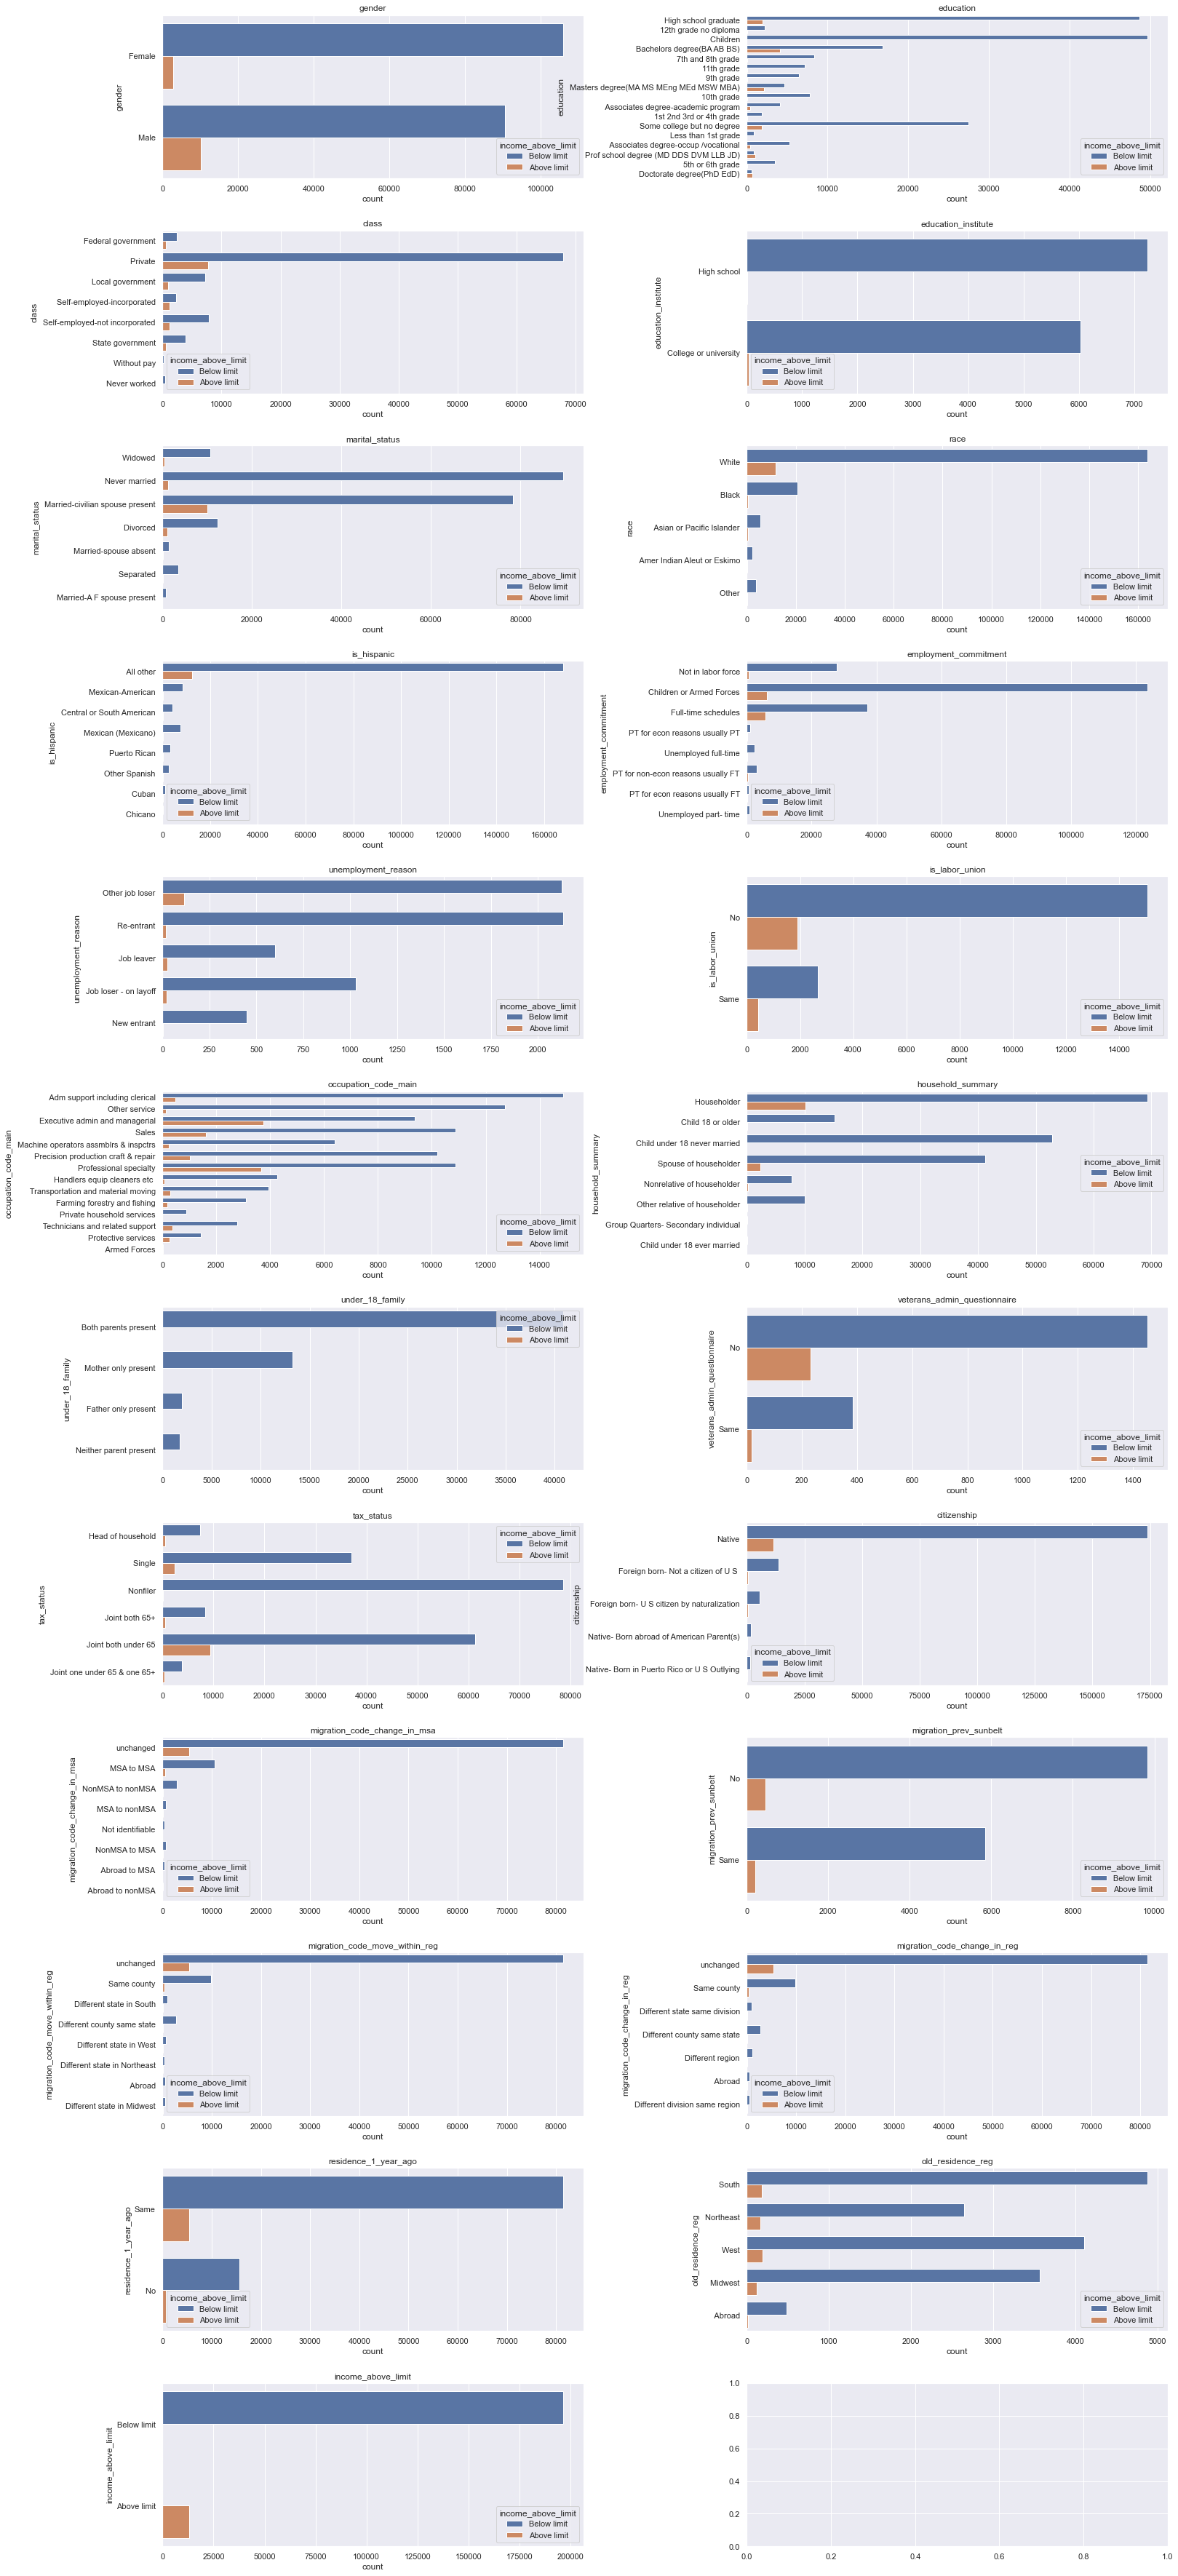

In [54]:
i=0
fig, axs = plt.subplots(nrows=12, ncols=2,figsize=(20,49))
fig.tight_layout(h_pad=4, w_pad=16)
sns.set(font_scale=1)
for column in df.select_dtypes(include='object'):
  if df[column].nunique() < 20:
    axs[i//2,i%2].set_title(column)
    sns.countplot(y=column, data=df,hue="income_above_limit",ax=axs[i//2,i%2])
    i=i+1
plt.show()

> General Observation
><div style="border-radius:4px; padding: 8px; background-color: #fef5fa; font-color: #e0e0e0; font-size:90%; text-align:left"><ul style="list-style-type:square">	
> <li>Males have more above imit income as compared to females.</li>
> <li>To have a good income, mostly high school graduates, degrees or degree programs are required.</li>
> <li>Education institute also supports the same observation as above.</li>
> <li>The private class has more job opportunities and a good income comparatively.</li>
> <li>Married Candidates with their other halfs strive for higher income.</li>
> <li>Unchanged migration code both moving and changing in reg helps increase income above the limit.</li>
</div>

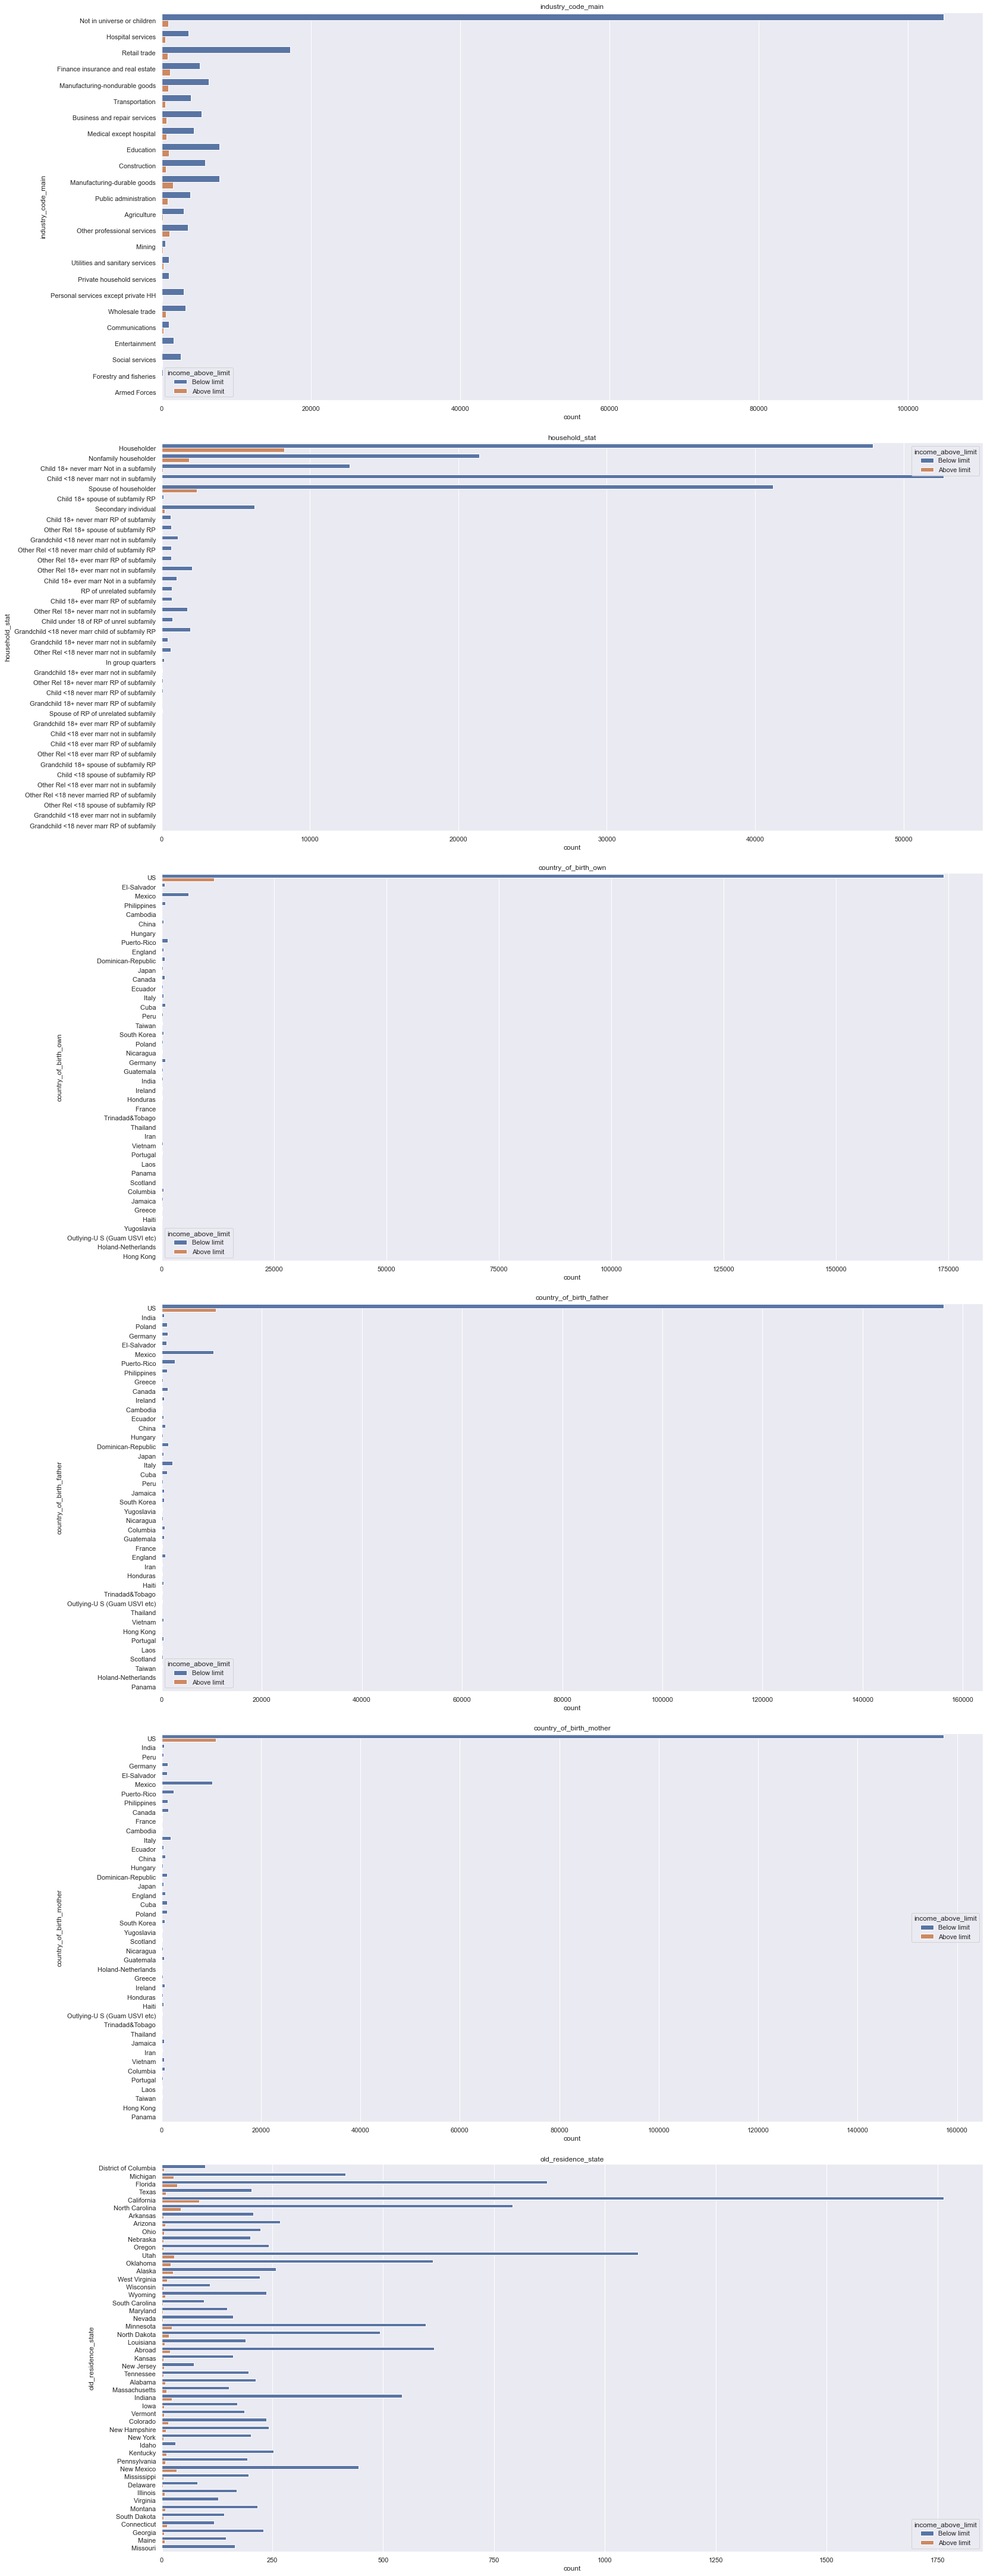

In [61]:
i=0
fig, axs = plt.subplots(nrows=6, ncols=1,figsize=(20,60))
fig.tight_layout(h_pad=4, w_pad=16)
sns.set(font_scale=1)
for column in df.select_dtypes(include='object'):
  if df[column].nunique() >= 20:
    axs[i].set_title(column)
    sns.countplot(y=column, data=df,hue="income_above_limit",ax=axs[i])
    i=i+1
plt.show()

> General Observation
><div style="border-radius:4px; padding: 8px; background-color: #fef5fa; font-color: #e0e0e0; font-size:90%; text-align:left"><ul style="list-style-type:square">	
> <li> Funny fact is :- Either mother, father or candidate's birth country is US or be a White for high income benefit.</li>
> <li> California, Utah, Florida & North Carolina has the most job opportunities</li></div>

* plotting for numerical variables

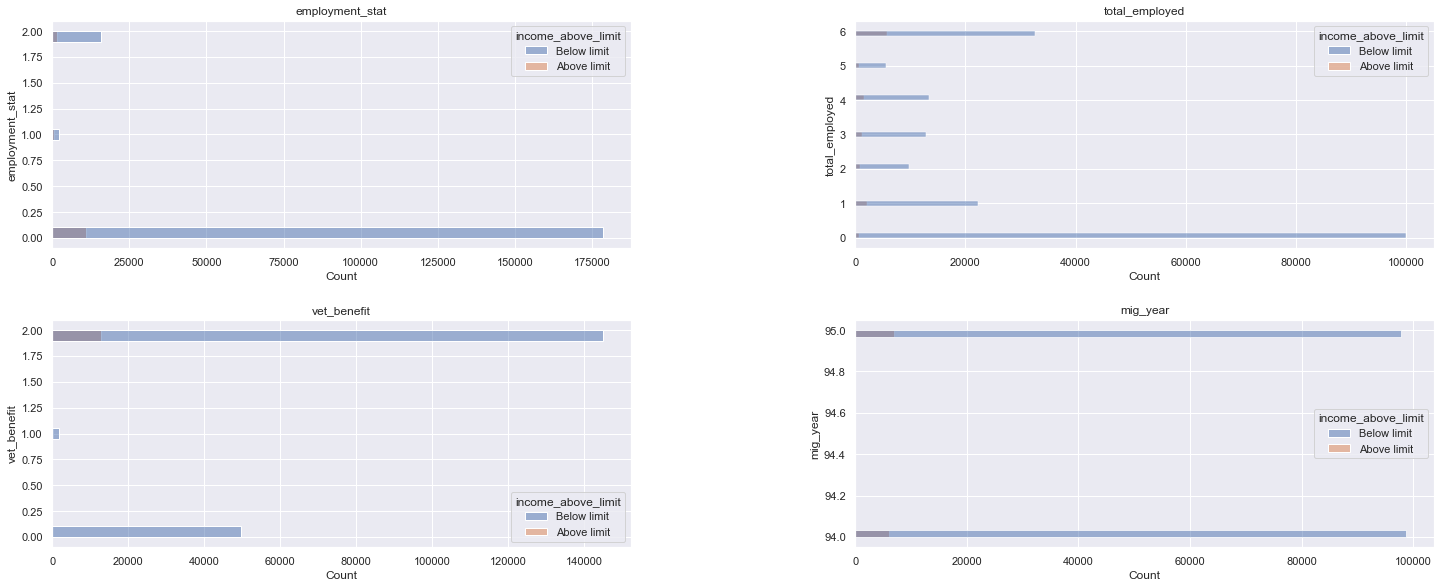

In [74]:
i=0
fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(20,8))
fig.tight_layout(h_pad=4, w_pad=16)
sns.set(font_scale=1)
for column in df.select_dtypes(include='int64'):
  if df[column].nunique() < 20:
    axs[i//2,i%2].set_title(column)
    sns.histplot(y=column, data=df,ax=axs[i//2,i%2], hue="income_above_limit")
    i=i+1
plt.show()

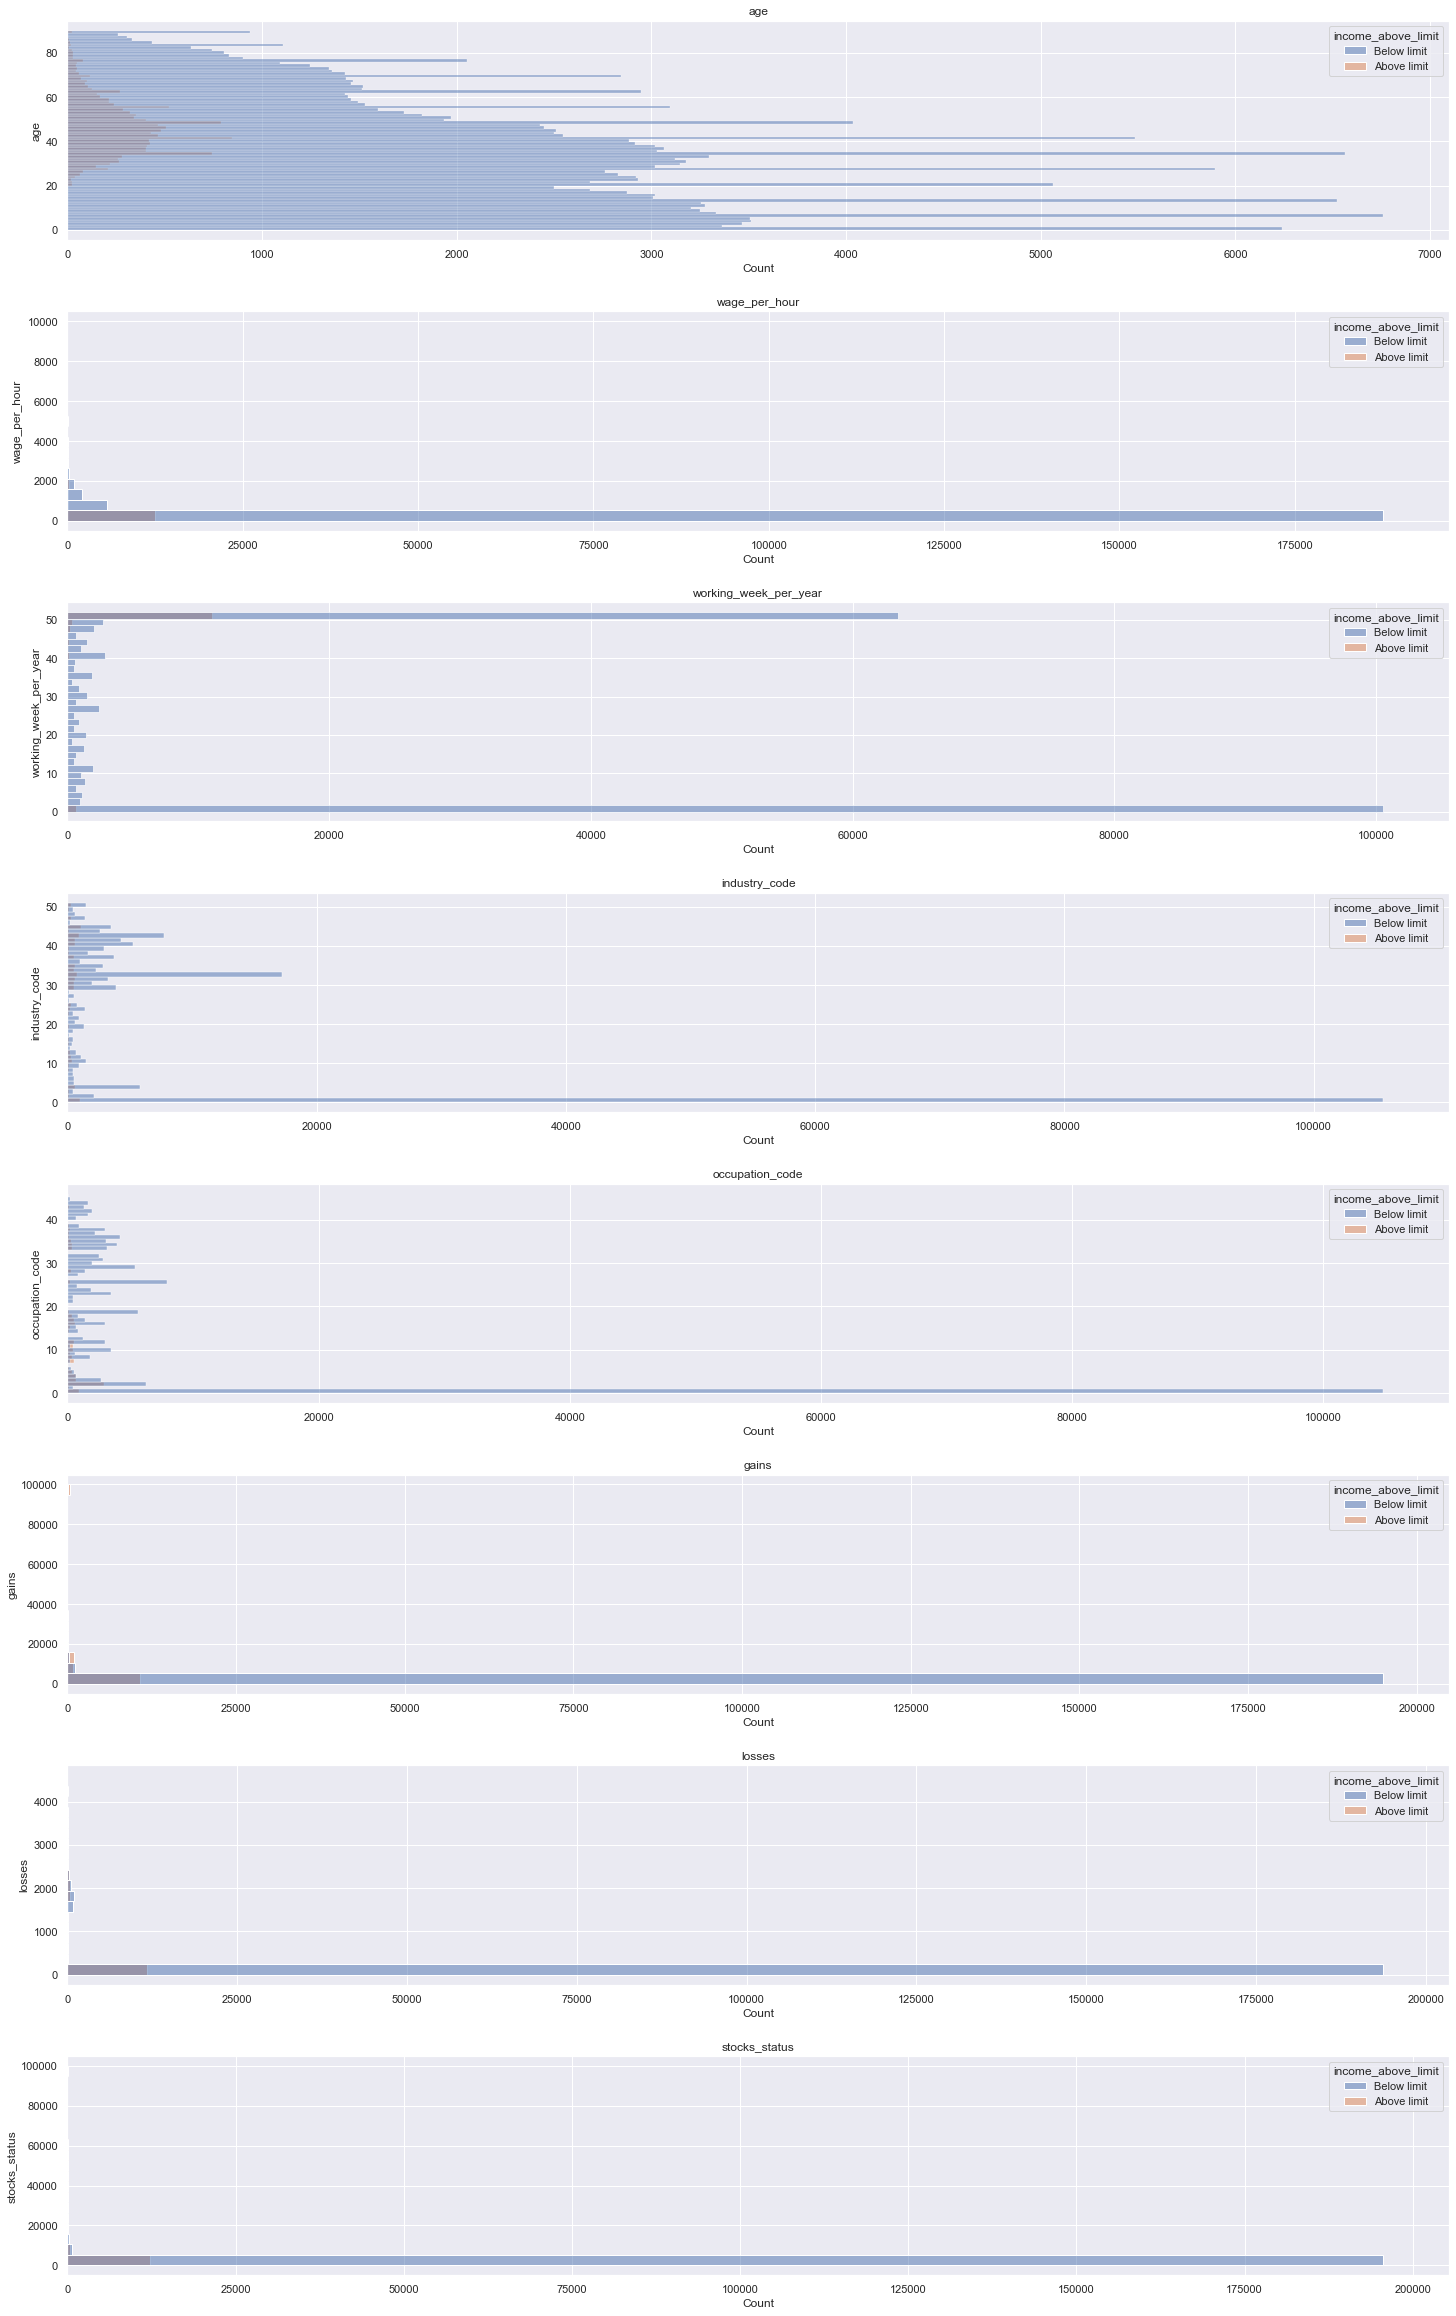

In [77]:
i=0
fig, axs = plt.subplots(nrows=8, ncols=1,figsize=(20,32))
fig.tight_layout(h_pad=4, w_pad=16)
sns.set(font_scale=1)
for column in df.select_dtypes(include='int64'):
  if df[column].nunique() >= 20:
    axs[i].set_title(column)
    sns.histplot(y=column, data=df,ax=axs[i], hue="income_above_limit")
    i=i+1
plt.show()

<AxesSubplot:xlabel='Count', ylabel='importance_of_record'>

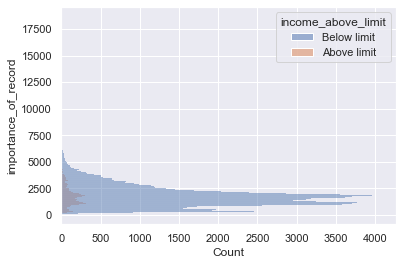

In [78]:
sns.histplot(y="importance_of_record", data=df, hue="income_above_limit")

<hr/>
<h3 align="center" style="color:Brown;"> 🛠️ Pre-processing 🛠️</h3>
<hr/>

* Let's check the columns with more than 50% of null values and their impact on income_above_limit

In [80]:
round((df.isna().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

age                                 0.0 %
gender                              0.0 %
education                           0.0 %
class                             50.24 %
education_institute               93.65 %
marital_status                      0.0 %
race                                0.0 %
is_hispanic                        0.57 %
employment_commitment               0.0 %
unemployment_reason               96.89 %
employment_stat                     0.0 %
wage_per_hour                       0.0 %
is_labor_union                    90.42 %
working_week_per_year               0.0 %
industry_code                       0.0 %
industry_code_main                  0.0 %
occupation_code                     0.0 %
occupation_code_main              50.45 %
total_employed                      0.0 %
household_stat                      0.0 %
household_summary                   0.0 %
under_18_family                   72.39 %
veterans_admin_questionnaire      99.01 %
vet_benefit                       

In [82]:
colnames = df.isna().sum()/len(df)
highnull_cols = list(colnames[colnames.values>=0.7].index)
print(highnull_cols)

['education_institute', 'unemployment_reason', 'is_labor_union', 'under_18_family', 'veterans_admin_questionnaire', 'migration_prev_sunbelt', 'old_residence_reg', 'old_residence_state']


* Removing columns with more than 70 % of null values

In [84]:
df.drop(columns = highnull_cols,axis=1,inplace=True)
df.shape

(209499, 34)

In [85]:
with open('../Data/df.joblib', 'wb') as f:
    joblib.dump(df,f,compress=3)

----
----

In [9]:
with open('../Data/df.joblib', 'r+') as f:
    df = joblib.load('../Data/df.joblib')

In [36]:
df['education'].unique()

array([' High school graduate', ' 12th grade no diploma', ' Children',
       ' Bachelors degree(BA AB BS)', ' 7th and 8th grade', ' 11th grade',
       ' 9th grade', ' Masters degree(MA MS MEng MEd MSW MBA)',
       ' 10th grade', ' Associates degree-academic program',
       ' 1st 2nd 3rd or 4th grade', ' Some college but no degree',
       ' Less than 1st grade', ' Associates degree-occup /vocational',
       ' Prof school degree (MD DDS DVM LLB JD)', ' 5th or 6th grade',
       ' Doctorate degree(PhD EdD)'], dtype=object)

##### Imputing null values


* Label Encoding the categorical variables for smooth data imputing

In [70]:
temp = df[0:5]
temp

,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,importance_of_record,income_above_limit
0,79,Female,High school graduate,NaN,Widowed,White,All other,Not in labor force,0,0,...,95,US,US,US,NaN,NaN,NaN,NaN,1779.74,Below limit
1,65,Female,High school graduate,NaN,Widowed,White,All other,Children or Armed Forces,0,0,...,94,US,US,US,unchanged,unchanged,unchanged,Same,2366.75,Below limit
2,21,Male,12th grade no diploma,Federal government,Never married,Black,All other,Children or Armed Forces,0,500,...,94,US,US,US,unchanged,unchanged,unchanged,Same,1693.42,Below limit
3,2,Female,Children,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,...,94,US,India,India,unchanged,unchanged,unchanged,Same,1380.27,Below limit
4,70,Male,High school graduate,NaN,Married-civilian spouse present,White,All other,Not in labor force,0,0,...,95,US,US,US,NaN,NaN,NaN,NaN,1580.79,Below limit


In [74]:
feature_names= df.columns
cols = df.loc[:, df.columns.isin(df.select_dtypes(include='object'))].columns
print(list(cols))
df.tail(5)


['gender', 'education', 'class', 'marital_status', 'race', 'is_hispanic', 'employment_commitment', 'industry_code_main', 'occupation_code_main', 'household_stat', 'household_summary', 'tax_status', 'citizenship', 'country_of_birth_own', 'country_of_birth_father', 'country_of_birth_mother', 'migration_code_change_in_msa', 'migration_code_move_within_reg', 'migration_code_change_in_reg', 'residence_1_year_ago', 'income_above_limit']


,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,importance_of_record,income_above_limit
209494,16,Female,7th and 8th grade,NaN,Never married,White,All other,Not in labor force,0,0,...,95,US,US,US,NaN,NaN,NaN,NaN,2170.60,Below limit
209495,78,Male,Bachelors degree(BA AB BS),NaN,Married-civilian spouse present,White,All other,Not in labor force,0,0,...,95,US,US,Canada,NaN,NaN,NaN,NaN,1029.57,Below limit
209496,8,Female,Children,NaN,Never married,White,All other,Children or Armed Forces,0,0,...,95,US,US,US,NaN,NaN,NaN,NaN,791.61,Below limit
209497,26,Female,Some college but no degree,Private,Married-civilian spouse present,White,All other,Children or Armed Forces,0,700,...,94,US,US,US,unchanged,unchanged,unchanged,Same,3530.26,Below limit
209498,19,Male,11th grade,Local government,Never married,Black,All other,Children or Armed Forces,0,0,...,94,US,US,US,MSA to MSA,Same county,Same county,No,1987.72,Below limit


In [75]:
lbl_encoder = OrdinalEncoder()
imputer = KNNImputer(n_neighbors=3)
df = lbl_encoder.fit_transform(df)


df = pd.DataFrame(imputer.fit_transform(df),columns = feature_names)
df = pd.DataFrame(lbl_encoder.inverse_transform(df),columns = feature_names)
df.tail(5)

,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,importance_of_record,income_above_limit
209494,16,Female,7th and 8th grade,Never worked,Never married,White,All other,Not in labor force,0,0,...,95,US,US,US,NonMSA to nonMSA,Same county,Same county,No,2170.6,Below limit
209495,78,Male,Bachelors degree(BA AB BS),Private,Married-civilian spouse present,White,All other,Not in labor force,0,0,...,95,US,US,Canada,unchanged,unchanged,unchanged,Same,1029.57,Below limit
209496,8,Female,Children,Private,Never married,White,All other,Children or Armed Forces,0,0,...,95,US,US,US,unchanged,unchanged,unchanged,Same,791.61,Below limit
209497,26,Female,Some college but no degree,Private,Married-civilian spouse present,White,All other,Children or Armed Forces,0,700,...,94,US,US,US,unchanged,unchanged,unchanged,Same,3530.26,Below limit
209498,19,Male,11th grade,Local government,Never married,Black,All other,Children or Armed Forces,0,0,...,94,US,US,US,MSA to MSA,Same county,Same county,No,1987.72,Below limit


In [76]:
with open('../Data/imputed_df.joblib', 'wb') as f:
    joblib.dump(df,f,compress=3)

----
----

In [15]:
with open('../Data/imputed_df.joblib', 'r') as f:
    new_df = joblib.load('../Data/imputed_df.joblib')

##### Feature Selection

* lets look for correlation between the features and the target  variable 

In [16]:
new_df.shape

(209499, 34)

In [22]:
new_df.isnull().sum()

age                               0
gender                            0
education                         0
class                             0
marital_status                    0
race                              0
is_hispanic                       0
employment_commitment             0
employment_stat                   0
wage_per_hour                     0
working_week_per_year             0
industry_code                     0
industry_code_main                0
occupation_code                   0
occupation_code_main              0
total_employed                    0
household_stat                    0
household_summary                 0
vet_benefit                       0
tax_status                        0
gains                             0
losses                            0
stocks_status                     0
citizenship                       0
mig_year                          0
country_of_birth_own              0
country_of_birth_father           0
country_of_birth_mother     

In [23]:
plt.figure(figsize=(28,22))
sns.set(font_scale=0.8)
sns.heatmap(new_df.corr(), annot=False, cmap="viridis")

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 2016x1584 with 0 Axes>

In [36]:
df1.head()

,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,unemployment_reason,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,NaN,...,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1779.74,Below limit
1,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,NaN,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,NaN,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,NaN,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,NaN,...,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1580.79,Below limit
